# Finance Data Project


**In this data project we will focus on exploratory data analysis of stock prices. 



**We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2024.

In [120]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data

We will get stock information for the following banks:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [121]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2024,11,30)

In [122]:
# Bank of america
BAC = yf.download("BAC",start,end)
#CitiGroup
C = yf.download("C",start,end)
#Goldman sachs
GS = yf.download("GS",start,end)
#JPMorgan Chase
JPM = yf.download("JPM",start,end)
#Morgan Stanley
MS = yf.download("MS",start,end)
#Wells Fargo
WFC = yf.download("WFC",start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [123]:
ticker = ["BAC","C","GS","JPM","MS","WFC"]

In [124]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=ticker)

In [125]:
bank_stocks.columns.names=["bank ticker","bank info","ticker"]

In [126]:
bank_stocks.columns = bank_stocks.columns.droplevel("ticker")

In [127]:
bank_stocks.head()

bank ticker        BAC                                                      C  \
bank info        Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.370403  31.437034  30.750724  31.263789  16296700  326.256836   
2006-01-04   31.037243  31.477015  30.950620  31.317097  17757900  320.233368   
2006-01-05   31.077221  31.203824  30.863998  31.037243  14970700  321.822083   
2006-01-06   31.030569  31.257118  30.883978  31.183823  12599800  321.822083   
2006-01-09   31.050570  31.297110  30.890654  31.130530  15619400  320.299622   

bank ticker                                               ...         MS  \
bank info          High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   326.852553  318.446272  324.337293  1537600  ...  32.405106   
2006-01-04   324.999148  320.034802  323.410561  1870960  ...  32.427345   
2006-01-05   322.881127  320.365866  320.630627  1143160  ...  32.516270   
2006-01-06   323.675431  319.042040  323.543040  1370210  ...  32.549606   
2006-01-09   322.616317  319.703904  321.689643  1680740  ...  32.894157   

bank ticker                                                  WFC             \
bank info         High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.505139  31.532597  31.771562  5377000  18.870819  18.915187   
2006-01-04   32.944182  32.427345  32.621855  7977800  18.651941  18.823494   
2006-01-05   32.560730  32.243959  32.538500  5778000  18.631241  18.666734   
2006-01-06   32.705212  32.260622  32.660754  6889800  18.740675  18.796873   
2006-01-09   32.949733  32.577387  32.582945  4144500  18.737720  18.826456   

bank ticker                                  
bank info          Low       Open    Volume  
Date                                         
2006-01-03   18.453768  18.693351  11016400  
2006-01-04   18.554333  18.811662  10870000  
2006-01-05   18.521801  18.634198  10158000  
2006-01-06   18.566164  18.681519   8403800  
2006-01-09   18.666734  18.737720   5619600  

[5 rows x 30 columns]

1. ** What is the max Close price for each bank's stock throughout the time period?**

In [128]:
bank_stocks.xs(key="Close",axis=1,level="bank info").max()

bank ticker
BAC     47.505741
C      388.967743
GS     605.570007
JPM    250.289993
MS     134.990005
WFC     77.349998
dtype: float64

2. show the returns for each bank's stock for daily basis?


Below is the formulaa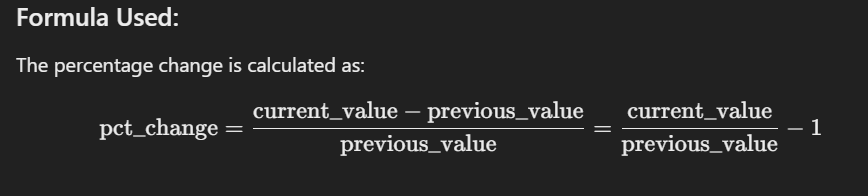

In [129]:
returns = pd.DataFrame()

In [130]:
for tick in ticker:
    returns[tick+" returns"] = bank_stocks[tick]["Close"].pct_change()

In [131]:
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003028,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000645,-0.004731,0.012030,0.016242,0.010585,-0.000158


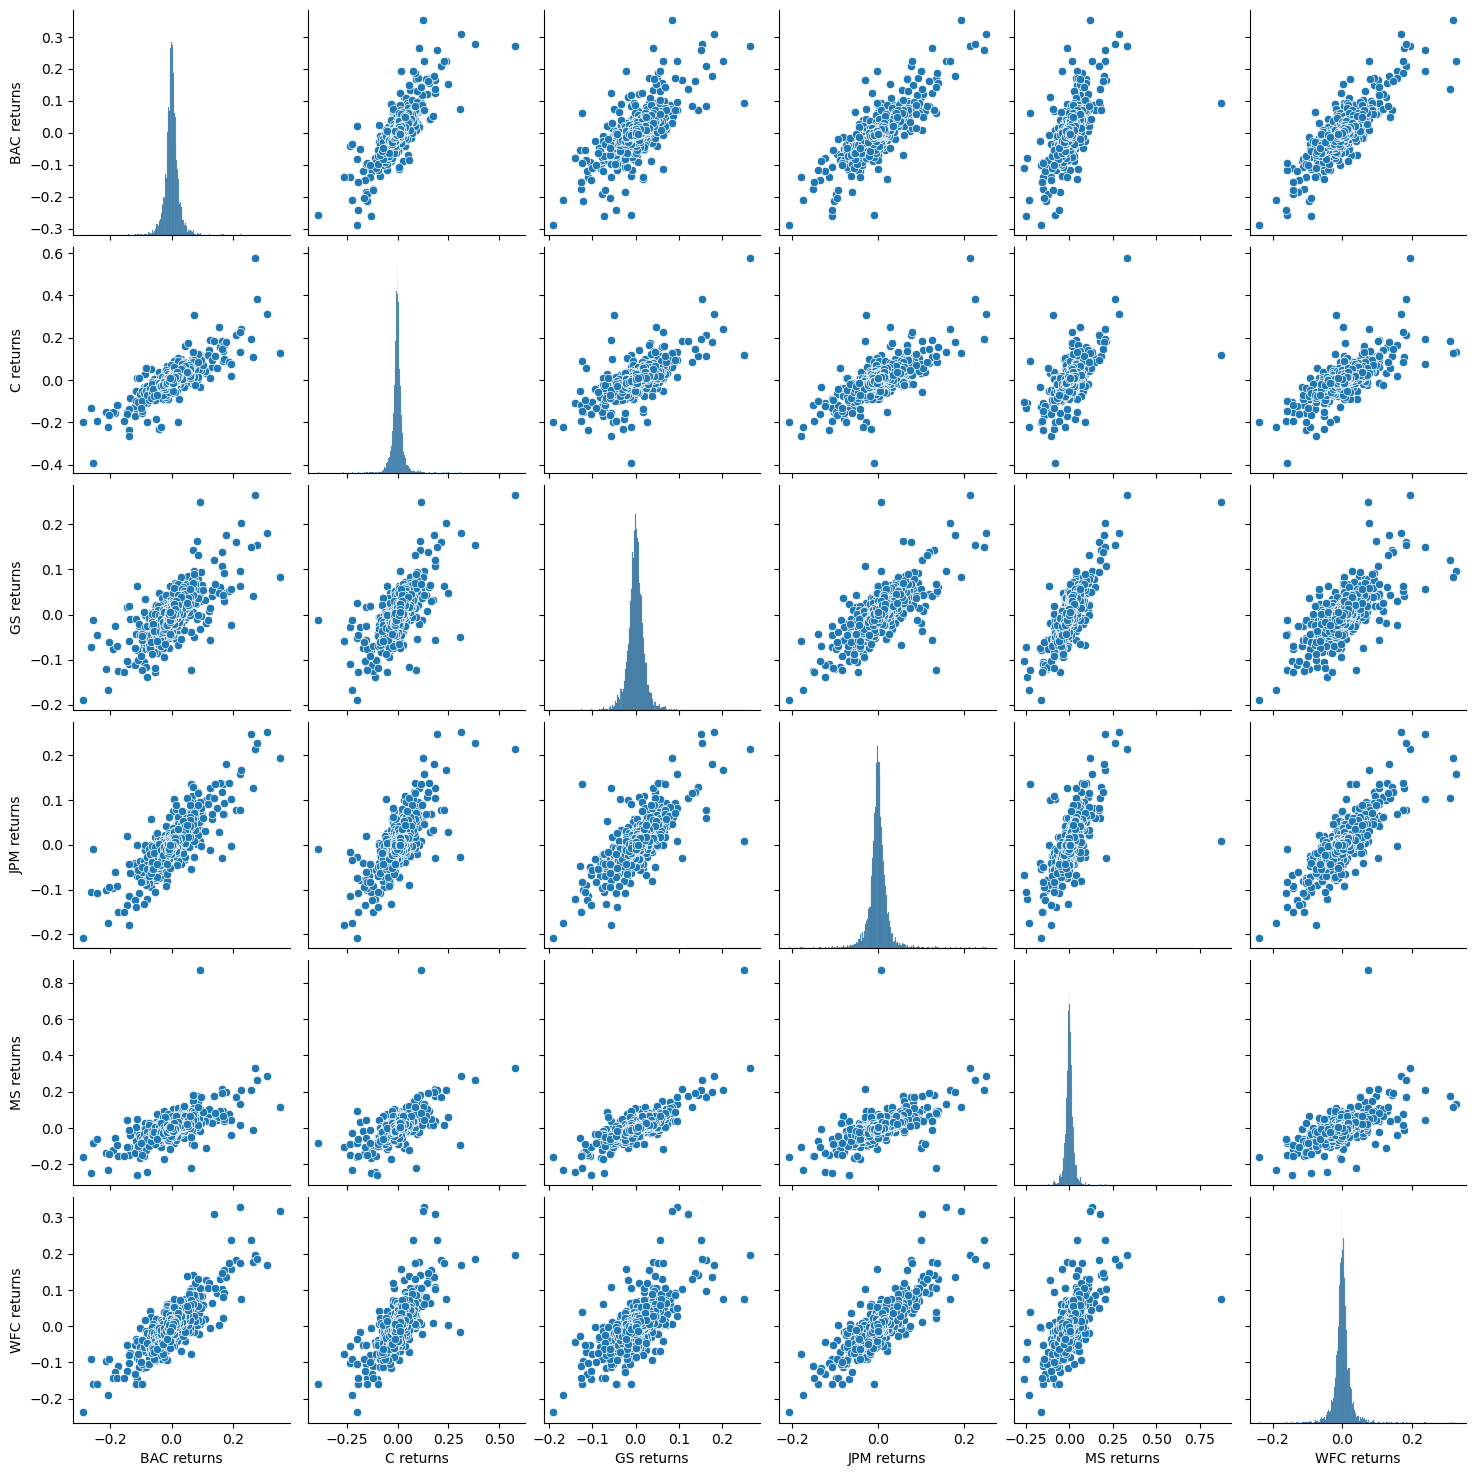

In [132]:
sns.pairplot(returns[1:])

3. what dates each bank stock had the best and worst single day returns?

In [133]:
returns.idxmin()

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

when i noticed the minimum day for each bank i get to know there where four bank with same date minimum and research came to know that Bank of America, under pressure over its takeover of loss-making Merrill Lynch, saw its shares dive by 29%. JP Morgan dropped 21%, Wells Fargo slid by 24% and Goldman Sachs fell 19%
This was the day Barack Obama was sworn in as the 44th President of the United States, the banking sector declined by 30%

In [134]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

4.which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2023?**

In [135]:
returns.std() # riskiest is citigroup for entire time period
#higher the standard deviation higher the risk

BAC returns    0.029984
C returns      0.031669
GS returns     0.022443
JPM returns    0.023472
MS returns     0.030709
WFC returns    0.026069
dtype: float64

In [136]:
returns.loc["2023-01-01":"2023-12-31"].std() #riskiest of 2023 is WFC(wells fargo) 

BAC returns    0.016924
C returns      0.016045
GS returns     0.015175
JPM returns    0.013068
MS returns     0.016302
WFC returns    0.017442
dtype: float64

5. visualize the 2023 returns of morgan stanley?

<Axes: xlabel='MS returns', ylabel='Count'>

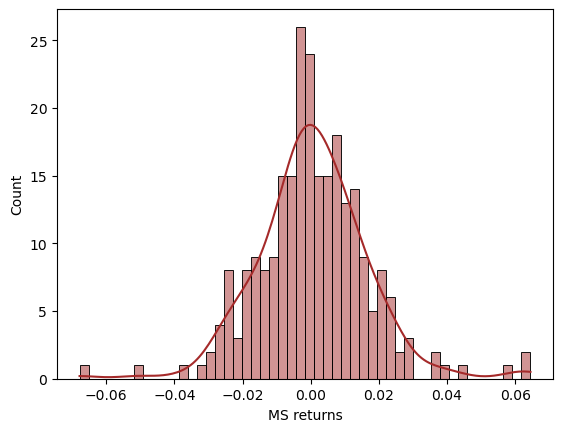

In [137]:
sns.histplot(returns.loc["2023-01-01":"2023-12-31"]['MS returns'],color="brown",bins=50,edgecolor="black",kde=True)
#the moderate volatility and symmetry suggest that MS was neither highly risky nor extraordinarily rewarding in 2023

6. visualize the 2023 returns of citi group?

<Axes: xlabel='WFC returns', ylabel='Count'>

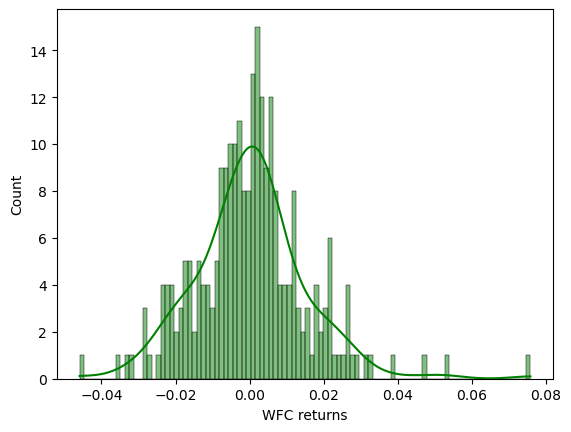

In [138]:
sns.histplot(returns.loc["2016-01-01":"2016-12-31"]["WFC returns"],kde=True,color="green",bins=100)
#in 2016 WFC stocks returns where mostly stable with low volatility 

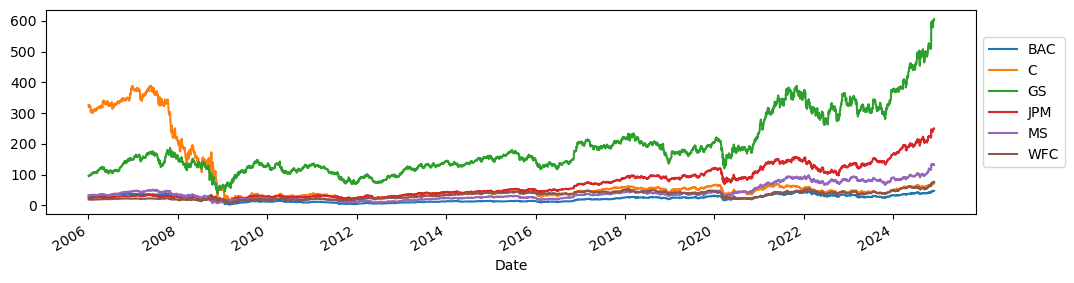

In [139]:
bank_stocks.xs(key="Close",level="bank info",axis=1).plot(figsize=(12,3))
plt.legend(loc=2,bbox_to_anchor=[1,0.9])

In [140]:
import cufflinks as cf
from plotly.offline import init_notebook_mode,download_plotlyjs,iplot,plot

In [141]:
cf.go_offline()
init_notebook_mode(connected=True)

In [142]:
bank_stocks.xs(key="Close",axis=1,level="bank info").iplot()
#Goldman Sachs has made extreme growth 
#while Citigroup bank has gone dowm after crash in 2009

 7. 30 day average against the Close Price for Bank Of America's stock for the year 2023

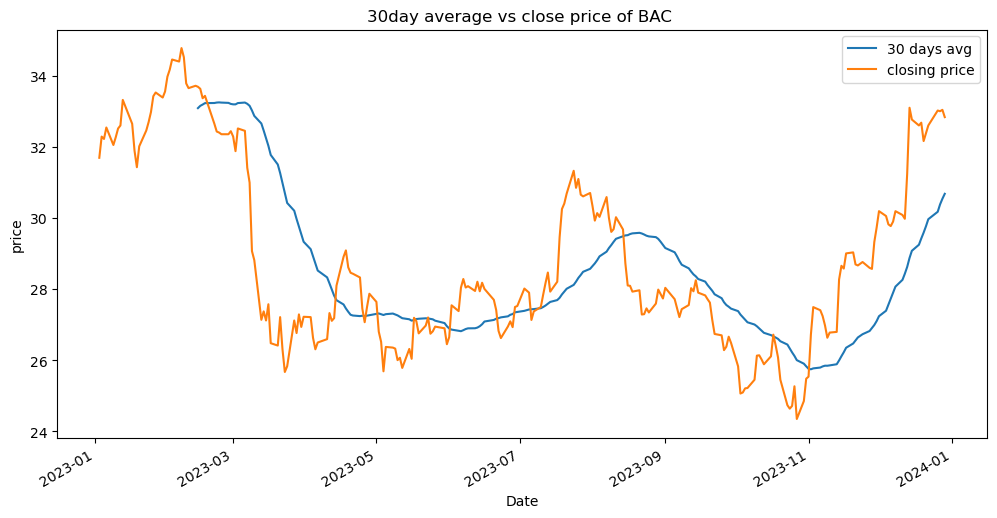

In [146]:
fig,ax=plt.subplots(figsize=(12,6))
BAC["Close"].loc["2023-01-01":"2024-01-01"].rolling(window=30).mean().plot(ax=ax)
BAC["Close"].loc["2023-01-01":"2024-01-01"].plot(ax=ax)
plt.title("30day average vs close price of BAC ")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend(labels=["30 days avg","closing price"])
plt.show()

8. find out correlation between the stocks Close Price.

<Axes: xlabel='bank ticker', ylabel='bank ticker'>

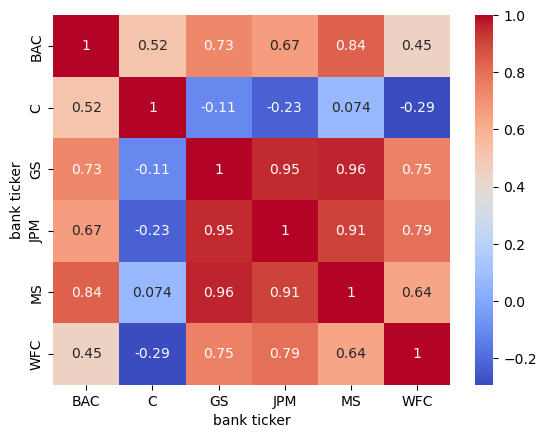

In [149]:
sns.heatmap(bank_stocks.xs(key="Close",axis=1,level="bank info").corr(),cmap="coolwarm",annot=True)

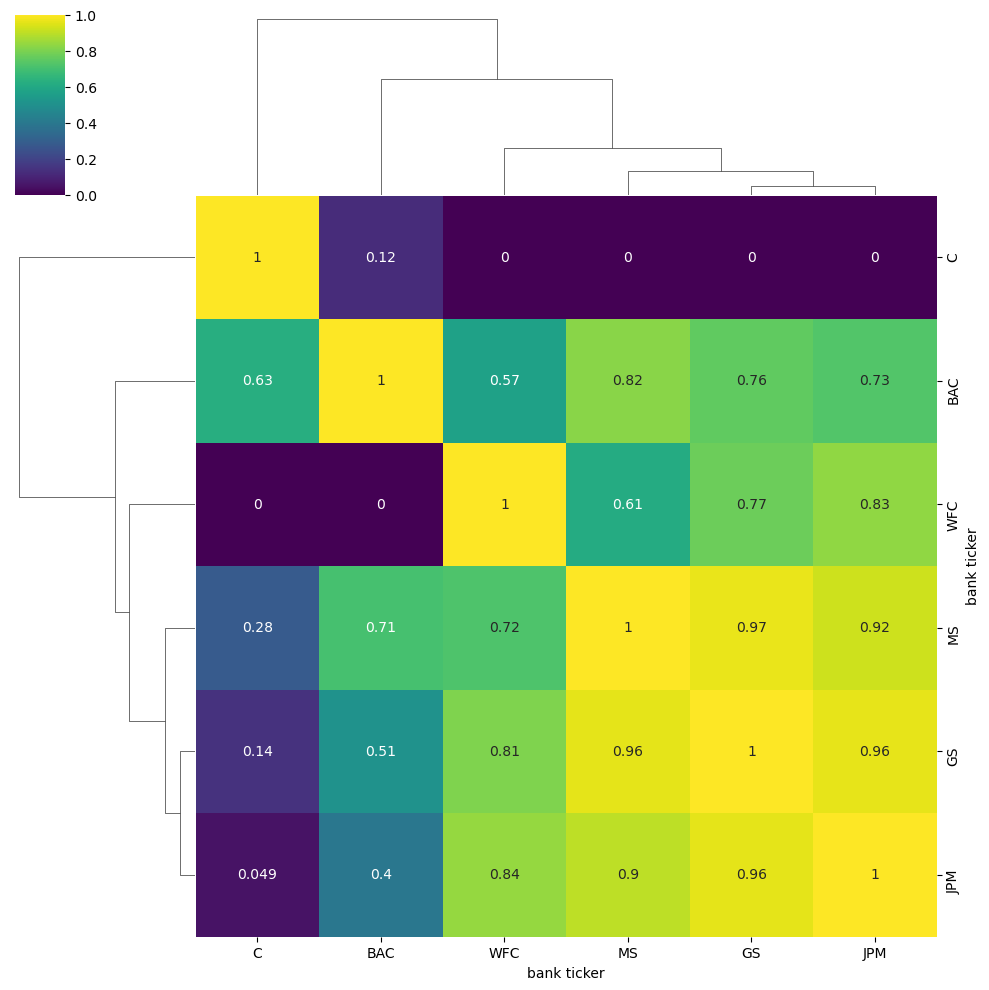

In [156]:
sns.clustermap(bank_stocks.xs(key="Close",axis=1,level="bank info").corr(),cmap="viridis",annot=True,standard_scale=1)

here we can see MS,GS & JPM are highly correlated with each other

lets have some technical analysis plot

In [166]:
BAC.columns= BAC.columns.droplevel("Ticker")
BAC[["Open","High",'Low','Close']].loc["2023-01-01":"2024-01-01"].iplot(kind="candle")
